In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
galton_data = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/Galtons_Height_Data_898.csv")
korean_data0 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/oseung.csv") # 오성
korean_data1 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team6.csv") # 6조
korean_data2 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team5.csv") # 가능충
korean_data3 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team4.csv") # 설명가능
korean_data4 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team3.csv") # 설명불가능
korean_data5 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team7.csv") # 도마구찌
korean_data6 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team8.csv") # 불사조
korean_data7 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team9.csv") # 슬로우스타터
korean_data8 = pd.read_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/team10.csv") # AI-KEY

## Korean data들 탐색  
data들마다 column들이 달라 일부는 csv 열고 수동으로 column 이름 바꿔줬음.

In [5]:
korean_data = pd.concat([korean_data0, korean_data1, korean_data2, korean_data3, korean_data4, korean_data5, korean_data6, korean_data7, korean_data8], ignore_index=True)
korean_data.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm),Father(inch),Mother(inch),Height(inch)
0,1,69.7,61.0,M,68.1,2,177.0,155.0,173.0,NaN,NaN,NaN
1,1,69.7,61.0,M,67.3,2,177.0,155.0,171.0,NaN,NaN,NaN
2,2,68.5,63.0,M,68.1,2,174.0,160.0,173.0,NaN,NaN,NaN
3,2,68.5,63.0,M,67.7,2,174.0,160.0,172.0,NaN,NaN,NaN
4,3,68.5,64.6,M,67.7,1,174.0,164.0,172.0,NaN,NaN,NaN


In [6]:
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Family        2687 non-null   int64  
 1   Father        1742 non-null   float64
 2   Mother        1742 non-null   float64
 3   Gender        2687 non-null   object 
 4   Height        1742 non-null   float64
 5   Kids          2687 non-null   int64  
 6   Father(cm)    2687 non-null   float64
 7   mother(cm)    2687 non-null   float64
 8   Height(cm)    2687 non-null   float64
 9   Father(inch)  200 non-null    float64
 10  Mother(inch)  200 non-null    float64
 11  Height(inch)  200 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 252.0+ KB


### 일부 데이터에 없는 column들(Father, Mother, Height)과 불필요한 column(Family)는 제외시킴. 

In [7]:
korean_data = korean_data.drop(['Family', 'Father', 'Mother', 'Height', 'Father(inch)', 'Mother(inch)', 'Height(inch)'], axis=1)
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2687 non-null   object 
 1   Kids        2687 non-null   int64  
 2   Father(cm)  2687 non-null   float64
 3   mother(cm)  2687 non-null   float64
 4   Height(cm)  2687 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 105.1+ KB


In [8]:
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      2687 non-null   object 
 1   Kids        2687 non-null   int64  
 2   Father(cm)  2687 non-null   float64
 3   mother(cm)  2687 non-null   float64
 4   Height(cm)  2687 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 105.1+ KB


In [9]:
korean_data.to_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/korean_data.csv")

### Gender 항목을 M, F 두개의 Column으로 one-hot encoding 적용

In [10]:
gender = pd.get_dummies(korean_data.Gender)
korean_data = pd.concat([gender, korean_data], axis=1)
korean_data = korean_data.drop(['Gender'], axis=1)
korean_data

,F,M,Kids,Father(cm),mother(cm),Height(cm)
0,0,1,2,177.0,155.0,173.0
1,0,1,2,177.0,155.0,171.0
2,0,1,2,174.0,160.0,173.0
3,0,1,2,174.0,160.0,172.0
4,0,1,1,174.0,164.0,172.0
...,...,...,...,...,...,...
2682,1,0,2,178.0,163.0,164.5
2683,0,1,2,178.0,163.0,180.0
2684,0,1,2,180.0,158.0,181.5
2685,0,1,2,180.0,158.0,174.0


In [11]:
korean_data.to_csv("/content/drive/MyDrive/데베응용-오성팀/코랩 노트북/data/korean_data_gender_one_hot_encoding.csv")
korean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           2687 non-null   uint8  
 1   M           2687 non-null   uint8  
 2   Kids        2687 non-null   int64  
 3   Father(cm)  2687 non-null   float64
 4   mother(cm)  2687 non-null   float64
 5   Height(cm)  2687 non-null   float64
dtypes: float64(3), int64(1), uint8(2)
memory usage: 89.3 KB


In [12]:
korean_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,2687.000000,2687.000000,2687.000000,2687.00000,2687.000000,2687.000000
mean,0.529587,0.470413,2.094901,173.75754,160.675750,168.856617
std,0.499217,0.499217,0.718027,6.14452,5.937762,9.072851
min,0.000000,0.000000,1.000000,157.00000,141.600000,144.500000
25%,0.000000,0.000000,2.000000,170.00000,157.000000,162.000000
50%,1.000000,0.000000,2.000000,173.00000,160.000000,168.300000
75%,1.000000,1.000000,2.000000,178.00000,164.000000,175.675000
max,1.000000,1.000000,5.000000,194.00000,187.000000,202.020000


In [13]:
korean_data[korean_data['F']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,1423.0,1423.0,1423.000000,1423.000000,1423.000000,1423.000000
mean,1.0,0.0,2.084329,173.762944,160.550323,162.639712
std,0.0,0.0,0.749064,5.813993,5.595969,5.990988
min,1.0,0.0,1.000000,157.000000,141.600000,144.500000
25%,1.0,0.0,2.000000,170.000000,157.000000,158.250000
50%,1.0,0.0,2.000000,173.000000,160.000000,162.780000
75%,1.0,0.0,2.000000,178.000000,164.000000,166.650000
max,1.0,0.0,5.000000,194.000000,187.000000,193.000000


In [14]:
korean_data[korean_data['M']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,1264.0,1264.0,1264.000000,1264.000000,1264.000000,1264.000000
mean,0.0,1.0,2.106804,173.751456,160.816954,175.855554
std,0.0,0.0,0.681495,6.498858,6.299658,6.486975
min,0.0,1.0,1.000000,157.000000,143.000000,150.000000
25%,0.0,1.0,2.000000,169.200000,157.300000,172.000000
50%,0.0,1.0,2.000000,173.000000,160.200000,175.925000
75%,0.0,1.0,2.000000,178.000000,165.000000,180.000000
max,0.0,1.0,5.000000,194.000000,183.530000,202.020000


## Galton 데이터 탐색

In [15]:
galton_data.head()

,Family,Father,Mother,Gender,Height,Kids,Father(cm),mother(cm),Height(cm)
0,1,78.5,67.0,M,73.2,4,199.39,170.18,185.928
1,1,78.5,67.0,F,69.2,4,199.39,170.18,175.768
2,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
3,1,78.5,67.0,F,69.0,4,199.39,170.18,175.260
4,2,75.5,66.5,M,73.5,4,191.77,168.91,186.690


In [16]:
# 안쓰는 columns 없애고 Gender one-hot encoding
galton_data = galton_data.drop(['Family', 'Father', 'Mother', 'Height'], axis=1)
gender = pd.get_dummies(galton_data.Gender)
galton_data = pd.concat([gender, galton_data], axis=1)
galton_data = galton_data.drop(['Gender'], axis=1)
galton_data

,F,M,Kids,Father(cm),mother(cm),Height(cm)
0,0,1,4,199.39,170.18,185.928
1,1,0,4,199.39,170.18,175.768
2,1,0,4,199.39,170.18,175.260
3,1,0,4,199.39,170.18,175.260
4,0,1,4,191.77,168.91,186.690
...,...,...,...,...,...,...
893,0,1,8,173.99,165.10,173.990
894,0,1,8,173.99,165.10,171.958
895,1,0,8,173.99,165.10,162.560
896,1,0,8,173.99,165.10,161.290


In [17]:
galton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           898 non-null    uint8  
 1   M           898 non-null    uint8  
 2   Kids        898 non-null    int64  
 3   Father(cm)  898 non-null    float64
 4   mother(cm)  898 non-null    float64
 5   Height(cm)  898 non-null    float64
dtypes: float64(3), int64(1), uint8(2)
memory usage: 29.9 KB


In [18]:
galton_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,0.482183,0.517817,6.135857,175.851441,162.774401,169.572154
std,0.499961,0.499961,2.685156,6.274450,5.859844,9.100613
min,0.000000,0.000000,1.000000,157.480000,147.320000,142.240000
25%,0.000000,0.000000,4.000000,172.720000,160.020000,162.560000
50%,0.000000,1.000000,6.000000,175.260000,162.560000,168.910000
75%,1.000000,1.000000,8.000000,180.340000,166.370000,177.038000
max,1.000000,1.000000,15.000000,199.390000,179.070000,200.660000


In [19]:
galton_data[galton_data['F']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,433.0,433.0,433.000000,433.000000,433.000000,433.000000
mean,1.0,0.0,6.311778,176.027866,162.990568,162.839811
std,0.0,0.0,2.722892,6.710421,5.783625,6.020612
min,1.0,0.0,1.000000,157.480000,147.320000,142.240000
25%,1.0,0.0,4.000000,172.720000,160.020000,158.750000
50%,1.0,0.0,6.000000,175.768000,162.560000,162.560000
75%,1.0,0.0,8.000000,180.340000,166.370000,166.370000
max,1.0,0.0,15.000000,199.390000,179.070000,179.070000


In [20]:
galton_data[galton_data['M']==1].describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,465.0,465.0,465.000000,465.000000,465.000000,465.000000
mean,0.0,1.0,5.972043,175.687157,162.573110,175.841196
std,0.0,0.0,2.641935,5.841820,5.929065,6.684249
min,0.0,1.0,1.000000,157.480000,147.320000,152.400000
25%,0.0,1.0,4.000000,172.720000,160.020000,171.450000
50%,0.0,1.0,6.000000,175.260000,162.560000,175.768000
75%,0.0,1.0,8.000000,179.070000,166.370000,180.340000
max,0.0,1.0,15.000000,199.390000,179.070000,200.660000


## Galton data와 Korean data 합친 height_data 생성

In [21]:
height_data = pd.concat([korean_data, galton_data], ignore_index=True)
height_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   F           3585 non-null   uint8  
 1   M           3585 non-null   uint8  
 2   Kids        3585 non-null   int64  
 3   Father(cm)  3585 non-null   float64
 4   mother(cm)  3585 non-null   float64
 5   Height(cm)  3585 non-null   float64
dtypes: float64(3), int64(1), uint8(2)
memory usage: 119.2 KB


In [22]:
height_data.describe()

,F,M,Kids,Father(cm),mother(cm),Height(cm)
count,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,0.517713,0.482287,3.107113,174.282037,161.201437,169.035850
std,0.499756,0.499756,2.292923,6.242741,5.987005,9.083836
min,0.000000,0.000000,1.000000,157.000000,141.600000,142.240000
25%,0.000000,0.000000,2.000000,170.000000,157.560000,162.000000
50%,1.000000,0.000000,2.000000,174.000000,161.100000,168.700000
75%,1.000000,1.000000,3.000000,178.000000,165.000000,175.960000
max,1.000000,1.000000,15.000000,199.390000,187.000000,202.020000


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0.5, 1.0, 'Galton vs Korean - Male')

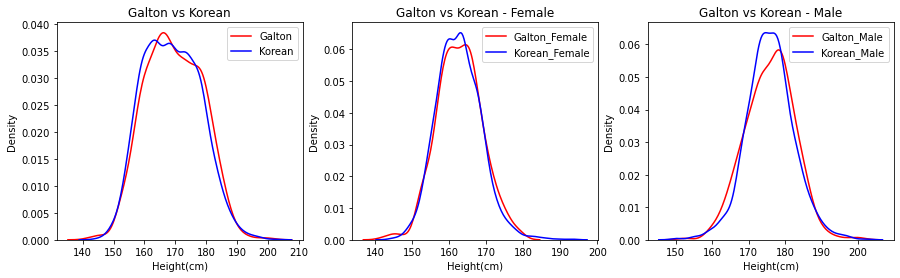

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

ax0 = sns.distplot(galton_data['Height(cm)'], label='Galton' , hist=False, ax=axes[0], color='r')
ax0 = sns.distplot(korean_data['Height(cm)'], label='Korean' , hist=False, ax=axes[0], color='b')

ax1 = sns.distplot(galton_data[galton_data['F'] == 1]['Height(cm)'], label='Galton_Female' , hist=False, ax=axes[1], color='r')
ax1 = sns.distplot(korean_data[korean_data['F'] == 1]['Height(cm)'], label='Korean_Female' , hist=False, ax=axes[1], color='b')

ax2 = sns.distplot(galton_data[galton_data['M'] == 1]['Height(cm)'], label='Galton_Male' , hist=False, ax=axes[2], color='r')
ax2 = sns.distplot(korean_data[korean_data['M'] == 1]['Height(cm)'], label='Korean_Male' , hist=False, ax=axes[2], color='b')

ax0.legend()
ax0.set_title('Galton vs Korean')

ax1.legend()
ax1.set_title('Galton vs Korean - Female')

ax2.legend()
ax2.set_title('Galton vs Korean - Male')

### 전체 height data를 대상으로 한 pairplot

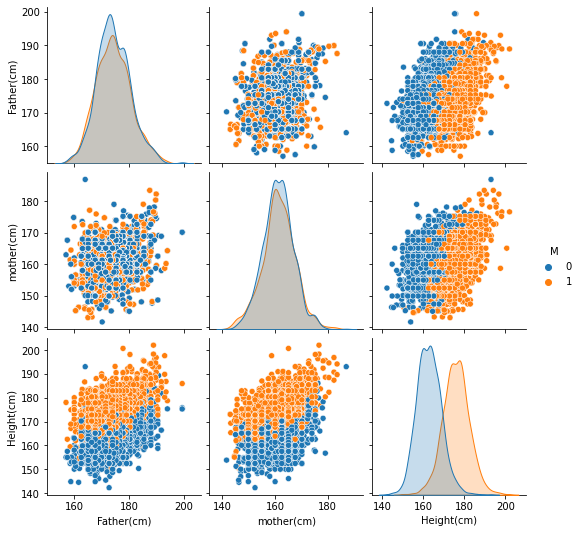

In [25]:
sns.pairplot(
    height_data,
    x_vars=["Father(cm)", "mother(cm)", "Height(cm)"],
    y_vars=["Father(cm)", "mother(cm)", "Height(cm)"],
    hue="M"
)

### 자녀 키에 따른 부모 키. 파랑 - Father, 주황 - Mother



Text(0, 0.5, 'Parents Height')

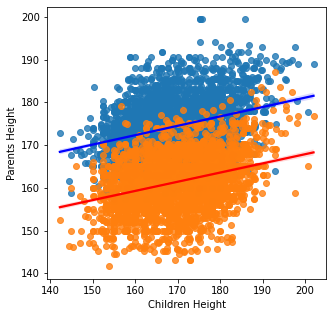

In [26]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Height(cm)', y='Father(cm)', data=height_data, line_kws={'color': 'blue'})
sns.regplot(x='Height(cm)', y='mother(cm)', data=height_data, line_kws={'color': 'red'})
plt.xlabel("Children Height")
plt.ylabel("Parents Height")

### 부모 키에 따른 자녀 키. 파랑 - Father, 주황 - Mother

Text(0, 0.5, 'Children Height')

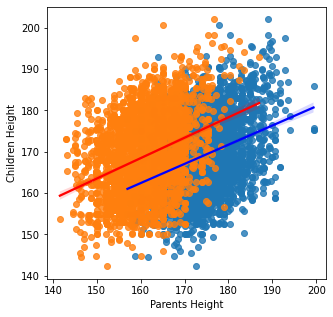

In [27]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data, line_kws={'color': 'blue'})
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data, line_kws={'color': 'red'})
plt.xlabel("Parents Height")
plt.ylabel("Children Height")

### 아빠키에 따른 자녀 키

Text(0, 0.5, 'Children Height')

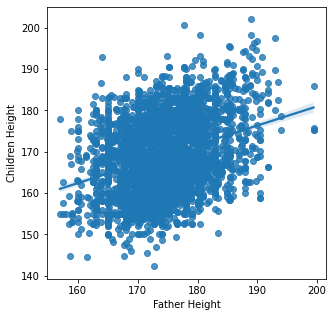

In [28]:
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data)
plt.xlabel("Father Height")
plt.ylabel("Children Height")

### 엄마키에 따른 자녀 키

Text(0, 0.5, 'Children Height')

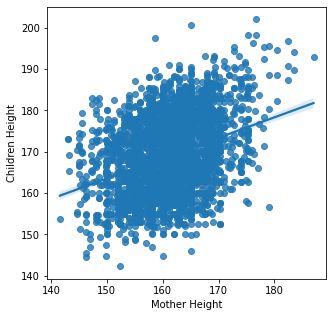

In [29]:
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data)
plt.xlabel("Mother Height")
plt.ylabel("Children Height")

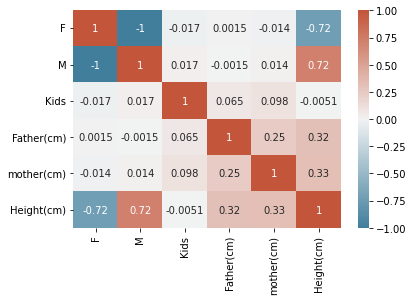

In [30]:
corr = height_data.corr()
corr['Height(cm)']
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True)

In [31]:
dauter_height = height_data[height_data['F'] == 1]
dauter_height

,F,M,Kids,Father(cm),mother(cm),Height(cm)
5,1,0,3,172.00,163.00,173.00
6,1,0,3,172.00,163.00,168.50
11,1,0,2,168.00,158.00,153.60
12,1,0,2,168.00,158.00,152.00
14,1,0,2,168.00,155.00,161.00
...,...,...,...,...,...,...
3574,1,0,3,157.48,167.64,154.94
3576,1,0,2,158.75,160.02,144.78
3582,1,0,8,173.99,165.10,162.56
3583,1,0,8,173.99,165.10,161.29


Text(0, 0.5, 'Dauter Height')

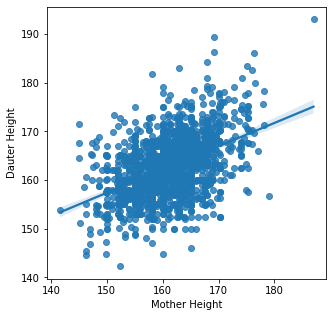

In [32]:
# 엄마와 딸
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data[height_data['F'] == 1])
plt.xlabel("Mother Height")
plt.ylabel("Dauter Height")

Text(0, 0.5, 'Son Height')

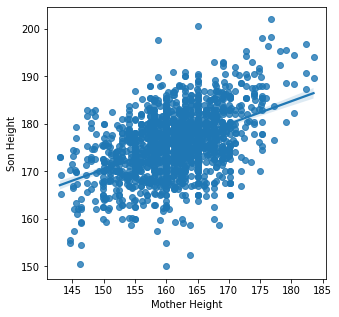

In [33]:
# 엄마와 아들
plt.figure(figsize=(5, 5))
sns.regplot(x='mother(cm)', y='Height(cm)', data=height_data[height_data['M'] == 1])
plt.xlabel("Mother Height")
plt.ylabel("Son Height")

Text(0, 0.5, 'Dauter Height')

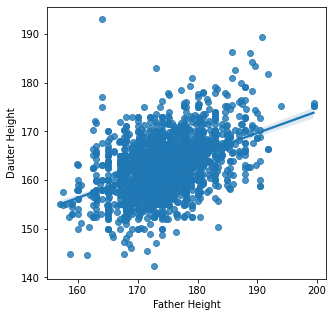

In [34]:
# 아버지와 딸
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data[height_data['F'] == 1])
plt.xlabel("Father Height")
plt.ylabel("Dauter Height")

Text(0, 0.5, 'Son Height')

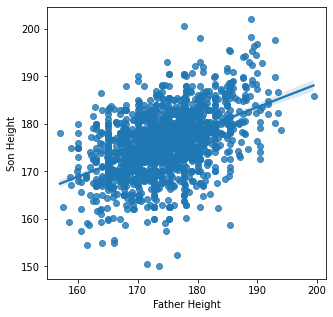

In [35]:
# 아버지와 아들
plt.figure(figsize=(5, 5))
sns.regplot(x='Father(cm)', y='Height(cm)', data=height_data[height_data['M'] == 1])
plt.xlabel("Father Height")
plt.ylabel("Son Height")

##남녀 분리

In [36]:
male_height_data = height_data[height_data['M']==1]
male_height_data = male_height_data.drop(['F', 'M'], axis=1)

In [37]:
male_height_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 3581
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kids        1729 non-null   int64  
 1   Father(cm)  1729 non-null   float64
 2   mother(cm)  1729 non-null   float64
 3   Height(cm)  1729 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 67.5 KB


In [38]:
female_height_data = height_data[height_data['F']==1]
female_height_data = female_height_data.drop(['F', 'M'], axis=1)

In [39]:
female_height_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 5 to 3584
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Kids        1856 non-null   int64  
 1   Father(cm)  1856 non-null   float64
 2   mother(cm)  1856 non-null   float64
 3   Height(cm)  1856 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 72.5 KB


## Data preparation

남성 키, 여성 키 별로 따로 데이터 분리

In [40]:
X_male = pd.DataFrame(male_height_data.iloc[:,:3])
y_male = pd.DataFrame(male_height_data['Height(cm)'])

X_female = pd.DataFrame(female_height_data.iloc[:,:3])
y_female = pd.DataFrame(female_height_data['Height(cm)'])

In [41]:
from sklearn.model_selection import train_test_split
X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.2, random_state=0)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.2, random_state=0)

독립변수 종속변수 분리

In [42]:
X = pd.DataFrame(height_data.iloc[:,:5])
y = pd.DataFrame(height_data['Height(cm)'])

Train data와 Test data 분리

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Multiple Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

y_predict = mlr.predict(X_test)

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 결정계수
r2 = r2_score(y_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.6787, MSE :  27.2915, RMSE :  5.2241


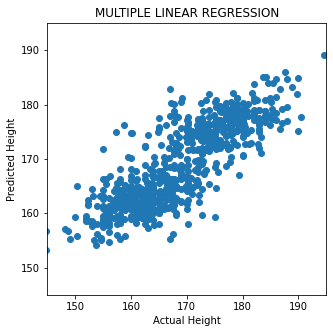

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [55]:
mlr = LinearRegression()
mlr.fit(X_male_train, y_male_train)

y_predict = mlr.predict(X_male_test)

In [56]:
# 결정계수
r2 = r2_score(y_male_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_male_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_male_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.2726, MSE :  31.1648, RMSE :  5.5825


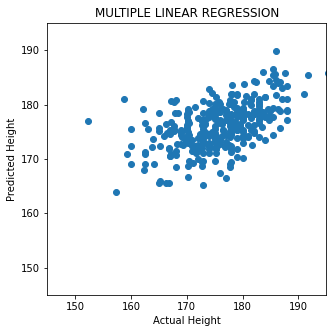

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_male_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [58]:
mlr = LinearRegression()
mlr.fit(X_female_train, y_female_train)

y_predict = mlr.predict(X_female_test)

In [59]:
# 결정계수
r2 = r2_score(y_female_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_female_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_female_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

R2 :  0.3729, MSE :  23.3551, RMSE :  4.8327


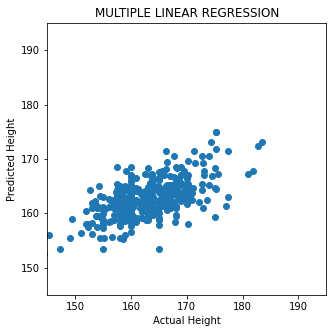

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_female_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

## Baysian Regression

In [49]:
from sklearn.linear_model import BayesianRidge

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train) 

y_predict_ = bayesian.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
# 결정계수
r2 = r2_score(y_test, y_predict)
# 평균제곱오차
mse = mean_squared_error(y_test, y_predict)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_predict)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("BAYESIAN REGRESSION")
plt.show()

## SVR

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준정규분포로 정규화
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_Xt = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)
X_test_sc = sc_Xt.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train_sc, y_train_sc)

y_pred = regressor.predict(X_test_sc)
# y_pred 결과를 원래 분포로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# 결정계수
r2 = r2_score(y_test, y_pred)
# 평균제곱오차
mse = mean_squared_error(y_test, y_pred)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("SVR REGRESSION")
plt.show()

## MLP with SGD

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준정규분포로 정규화
sc_X = StandardScaler()
sc_y = StandardScaler()
sc_Xt = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)
X_test_sc = sc_Xt.fit_transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', random_state=0, alpha=0.001, learning_rate_init=0.1, max_iter=200)
mlp.fit(X_train_sc, y_train_sc)

y_pred = mlp.predict(X_test_sc)
# y_pred 결과를 원래 분포로 복원
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [ ]:
# 결정계수
r2 = r2_score(y_test, y_pred)
# 평균제곱오차
mse = mean_squared_error(y_test, y_pred)
# 평균제곱오차 제곱근
rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
print("R2 : {0: .4f}, MSE : {1: .4f}, RMSE : {2: .4f}".format(r2, mse, rmse))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("MLP with SGD REGRESSION")
plt.show()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 10, 50, 100]

for a in alphas:
    model = Ridge(alpha=a).fit(X_train, y_train)
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

ridge_cv = RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(X_train, y_train)
print(model.alpha_)

In [ ]:
model_ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred = model_ridge.predict(X_test)
score_ridge = model_ridge.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("Ridge REGRESSION")
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

for a in alphas:
    model = Lasso(alpha=a).fit(X_train, y_train.to_numpy().ravel())
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

lasso_cv = LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(X_train, y_train.to_numpy().ravel())
print(model.alpha_)

In [ ]:
model_lasso = Lasso(alpha=0.01).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
score_lasso = model_lasso.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("Lasso REGRESSION")
plt.show()

## Elastic

In [ ]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train, y_train.to_numpy().ravel())
    score = model.score(X_train, y_train.to_numpy().ravel())
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train.to_numpy().ravel(), pred_y)
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}".format(a, score, mse, np.sqrt(mse)))

elastic_cv = ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(X_train, y_train.to_numpy().ravel())
print(model.alpha_)

In [ ]:
model_elastic = ElasticNet(alpha=0.001).fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
score_elastic = model_elastic.score(X_test, y_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score_elastic, mse_elastic, np.sqrt(mse_elastic)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_elastic)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("ElasticNet REGRESSION")
plt.show()

## AdaBoost

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=0)
grid_param={'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1], 'n_estimators':[100, 200, 300, 400]}
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(ada, param_grid=grid_param, cv=kfold, scoring='r2', refit=True).fit(X_train, y_train.to_numpy().ravel())
y_pred = grid_search.best_estimator_.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("AdaBoost REGRESSION")
plt.show()

## XGBoost

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(random_state=0, objective = 'reg:squarederror')
xgb.fit(X_train, y_train.to_numpy().ravel())
y_pred = xgb.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("XGBoost REGRESSION")
plt.show()

## LightGBM

In [ ]:
import lightgbm as lgb

lgbmreg = lgb.LGBMRegressor(random_state=0)
lgbmreg.fit(X_train, y_train.to_numpy().ravel())
y_pred = lgbmreg.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("LightGBM REGRESSION")
plt.show()

## CatBoost

In [ ]:
from catboost import CatBoostRegressor, Pool, cv

# model = CatBoostRegressor(iterations=1000, learning_rate=1, loss_function='RMSE')
model = CatBoostRegressor(iterations=50, loss_function='RMSE')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
print("R2 : {0:.4f}, MSE : {1:.4f}, RMSE : {2:.4f}".format(score, mse, np.sqrt(mse)))

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")
plt.xlim([145,195])
plt.ylim([145,195])
plt.title("CatBoost REGRESSION")
plt.show()